<a href="https://colab.research.google.com/github/institutohumai/cursos-python/blob/master/DeepLearning/4_PyTorch_Avanzado/2_pytorch_gpu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>
# Uso de GPU en Deep Learning

No son pocas las veces que habrán escuchado decir que entrenar modelos de deep learning sobre una GPU es mucho más rápido que hacerlo sobre una CPU. También son muchas las ocasiones en las que habrán escuchado que uno de los elementos claves que ha permitido que esta revolución de la inteligencia artificial surja ha sido el desarrollo de la aceleración por hardware. Pero por qué?  Qué diferencia hay entre una CPU o una GPU? Cómo funcionan estos procesadores internamente y por qué podemos conseguir que nuestros modelos de deep learning se entrenen más rápido si los utilizamos? En la clase de hoy nos vamos a meter en el mundo del hardware para poder entender y desarrollar una intuición sobre esto.

# CPUs

En toda computadora tenemos una **U**nidad de **P**rocesamiento **C**entral (CPU por sus siglas en inglés) que es la encargada de la ejecución de las
instrucciones. Estos procesadores fueron ideados con un propósito general, es decir que su estructura busca versatilidad en lugar de eficiencia. Después de todo, el mismo chip se usa para tareas tan diversas como:

* procesadores de texto
* navegador de internet
* videojuegos
* editores de video
* etc.


Las CPUs fueron diseñadas siguiendo una **Arquitectura de Von Neumann** que propone que cuente con los siguientes elementos básicos:
- **Unidad Aritmética-Lógica (ALU)**: circuito lógico que implementa operaciones
de aritmética binaria (típicamente la operaciones básicas para representaciones
"binario" y "complemento a 2" y lógicas (típicamente AND, OR, EXOR y NOT bit
a bit). También es habitual que implemente operaciones de desplazamiento y/o
rotación de bits.
- **Unidad de Control**: circuito secuencial que implementa el denominado "ciclo de
instrucción", permitiendo acceder a la siguiente instrucción de un programa, leer
sus operandos, efectuar la operación indicada en la ALU y guardar el resultado
de la misma.
- **Conjunto de Registros**: una serie de posiciones especiales de
memoria, ubicadas físicamente dentro de la propia CPU, que permiten un
acceso a operandos y lugares de almacenamiento de resultados mucho más
veloz que si estuvieran en el sistema de memoria normal. Algunos de estos
registros son de uso interno de la propia CPU (más precisamente de su Unidad
de Control) y otros son accesibles y utilizables por el programador.

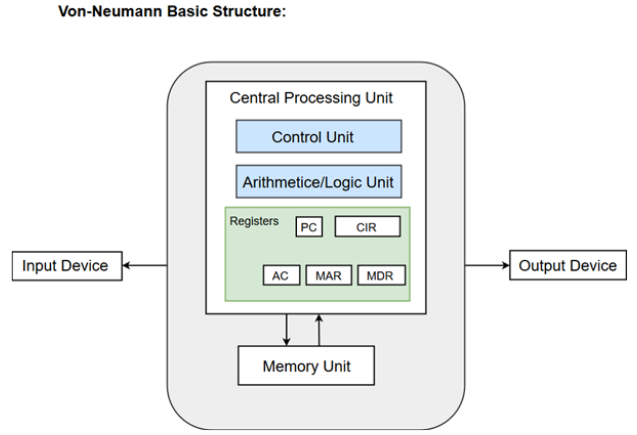

### Conjunto de Instrucciones

Un conjunto de instrucciones es una especificación que detalla las instrucciones que una unidad central de procesamiento puede entender y ejecutar, o el conjunto de todos los comandos implementados por un diseño particular de una CPU. Es decir, estas instrucciones están implementadas en el hardware del CPU mediante diversas combinaciones de transistores.

Procesadores con diferentes diseños internos pueden compartir un conjunto de instrucciones; por ejemplo, el Intel Pentium y AMD Athlon implementan versiones casi idénticas del conjunto de instrucciones x86, aunque tienen diseños diferentes. 

La mayoría de las instrucciones de cualquier conjunto existente se agrupan en alguna de las siguientes categorías:

*  **Transferencia de datos**: Copian datos de un origen a un destino, sin modificar el origen y normalmente sin afectar a los flags o indicadores de condición.

*  **Instrucciones lógicas y aritméticas**: Son efectuadas por la ALU y suelen cambiar los flags o indicadores de condición. 

* **Instrucciones de comparación**: comparan dos datos fijandose generalmente cuál es mayor

* **Instrucciones de control**: Permiten modificar la secuencia normal de ejecución de un programa, puede hacerse por salto condicional relativo o absoluto.

* **Instrucciones de entrada y salida**: Son instrucciones de transferencia salvo que el origen/destino de dicho flujo es un puerto de un dispositivo de entrada y salida


Teniendo este conjunto de instrucciones, un CPU debería seguir los siguientes pasos para calcular, por ejemplo, una función ReLU:

1. Leer el valor de entrada de memoria
2. Comparo el valor de entrada con 0
3. Si es mayor devolver el valor de entrada. Si no es mayor devolver 0.

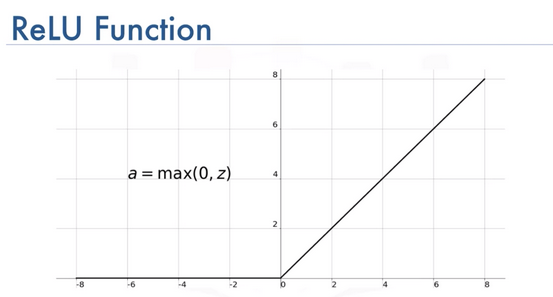

Cada una de estas instrucciones demora un ciclo de reloj, por lo que deberíamos gastar 3 ciclos para calcular la función. 


Pero ¿qué pasaría si quisiéramos optimizar esto y asegurarnos de que la función ReLU se ejecute más rápidamente dado que vamos a tener que calcularla muchas veces durante el entrenamiento de una red? Nuestra única opción sería cambiar el diseño electrónico de nuestro CPU para que ahora la **instrucción ReLU** esté incluída dentro de nuestro conjunto. De esta manera, la función ReLU también estaría programada mediante una combinación de transistores que se ejecutaría en un solo tiempo de reloj.

Con este ejemplo nos tiene que quedar claro que, aunque el CPU sea muy bueno para llevar adelante tareas diversas, es relativamente sencillo diseñar procesadores más eficientes para propósitos específicos.

### Analogía entre CPU y MLP

Se podría pensar que el CPU es dentro de los procesadores como el MLP dentro de las arquitecturas de redes neuronales. Es decir, está matemáticamente demostrado que el MLP es capaz de aproximar una función para aproximar cualquier tipo de problema, pero eso no quiere decir que no puedan existir algunas arquitecturas que sean mucho más eficientes para resolver problemas específicos. 

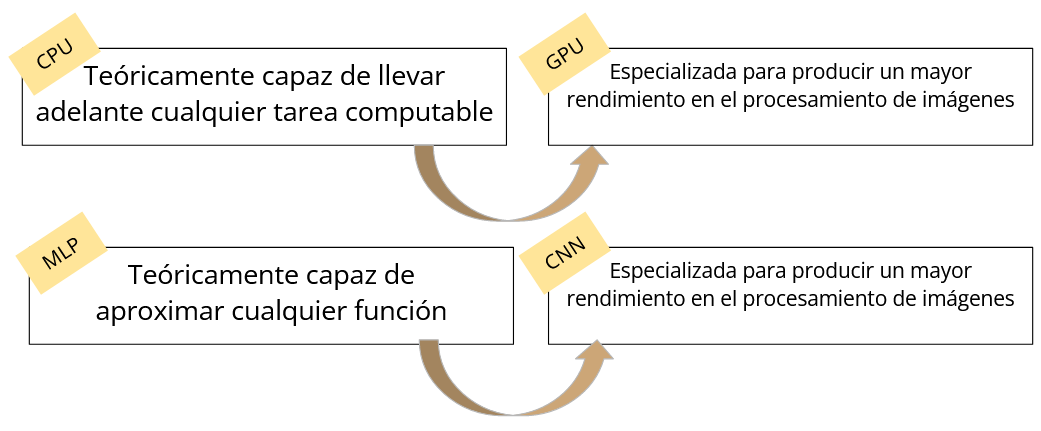


# GPUs

Las **U**nidades de **P**rocesamiento **G**ráfico (o GPU por sus siglas en inglés) son un procesador de propósito específico con un conjunto de operaciones optimizado para el procesamiento gráfico. Por ejemplo, las GPU actuales están optimizadas para cálculo con **valores en coma flotante**, predominantes en los gráficos 3D. 

Por otro lado, muchas aplicaciones gráficas conllevan un alto grado de **paralelismo** inherente, al ser sus unidades fundamentales de cálculo (vértices y píxeles) completamente independientes. Si bien, últimamente las CPUs están apostando a arquitecturas multinúcleo, estos están en el órden de los 16 o 32 núcleos por chip, mientras que en una GPU están en el orden de los miles. 



![](https://i.imgur.com/wzi8o8W.gif)

Sin embargo, estos núcleos no son iguales, sino que los núcleos de las GPUs son, a nivel de circuitos, muchos más sencillos y se especializan en realizar operaciones aritméticas (como las ALUs de las CPUs) con un conjunto de operaciones reducidas. 

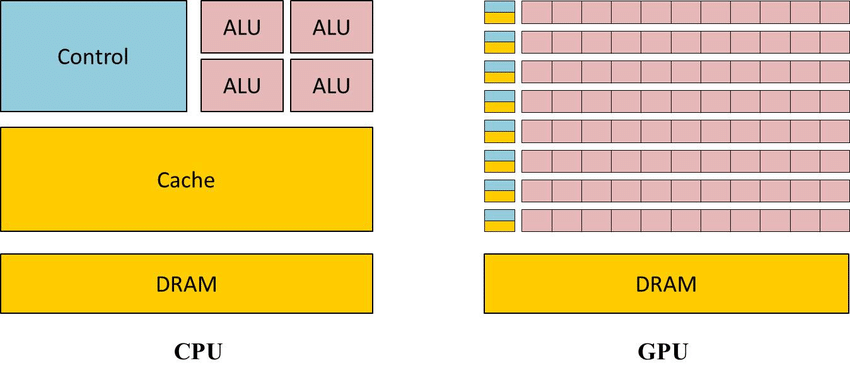

### Paralelismo
En la sección anterior vemos que las GPUs están diseñadas para tener muchos núcleos que realicen tareas simples en paralelo. Esto puede llegar a ser muy útil por ejemplo al realizar operaciones algebraicas como las operaciones de matrices. Dado que cada celda del resultado en una operación matricial es independiente de las otras celdas, se le podría asignar a cada núcleo de la GPU que resuelva una celda y luego rearmar la matriz a partir de estos resultados.

![](https://i.imgur.com/kZNvPFB.gif)

Para los que estudiaron algo de Álgebra Lineal les resultará conocido el concepto de que todas los transformaciones visuales sobre un cuerpo se pueden expresar como operaciones matriciales. Es por esto que las GPUs, cuyo propósito principal fue históricamente ocuparse del procesamiento gráfico, están diseñadas para ejecutar de manera increíblemente rápida las operaciones básicas del Álgebra Lineal.



![](https://i.imgur.com/dZzheLt.gif)

Sin embargo, como ya hemos visto en este curso, las operaciones esenciales de una red neuronal también se pueden expresar como operaciones matriciales. Por lo tanto, el Deep Learning tambbién se puede beneficiar de las aptitudes de las GPUs para la paralelización.

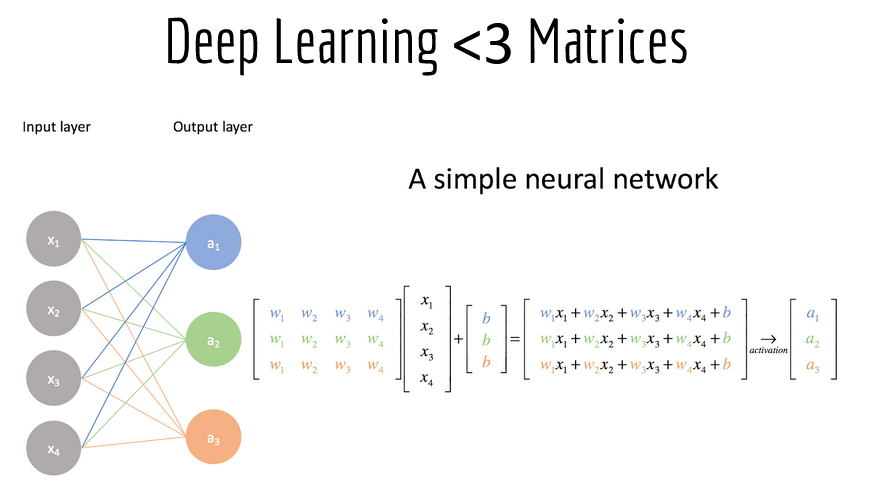

# CUDA y las GPGPUs

CUDA son las siglas de **C**ompute **U**nified **D**evice **A**rchitecture que hace referencia a una plataforma de computación en paralelo incluyendo un compilador y un conjunto de herramientas de desarrollo creadas por Nvidia que permiten a los programadores usar una variación del lenguaje de programación C para codificar algoritmos en GPU de Nvidia. Por medio de wrappers se puede usar Python, Fortran y Java en vez de C/C++.

Desde su lanzamiento en el 2007 CUDA ha permitido que las GPUs se transformen en procesadores de propósito general (General Purpose Graphic Processing Units).
Su uso en el Deep Learning se catapultó con un [paper](http://robotics.stanford.edu/~ang/papers/icml09-LargeScaleUnsupervisedDeepLearningGPU.pdf) del 2009 que mostraba que entrenar redes grandes con GPUs tardaba hasta 70 veces menos que con CPUs.


En esta sección, comenzamos a discutir cómo ejecutar código PyTorch sobre GPUs mediante CUDA.

Específicamente, discutiremos cómo
usar una sola GPU NVIDIA para los cálculos.
Primero, asegúrese de tener al menos una GPU NVIDIA instalada.
Luego, descargue el [controlador de NVIDIA y CUDA] (https://developer.nvidia.com/cuda-downloads)
y siga las indicaciones para establecer la ruta adecuada.
Una vez realizados estos preparativos,
se puede usar el comando `nvidia-smi`
 para **ver la información de la tarjeta gráfica**.


In [ ]:
!nvidia-smi

En PyTorch, cada tensor tiene un `device`, a menudo lo llamamos contexto.
Hasta ahora, de forma predeterminada, todas las variables y los cálculos asociados se han asignado a la CPU. Por lo general, otros contextos pueden ser varias GPU. Las cosas pueden complicarse aún más cuando implementamos trabajos en varios servidores.
Al asignar tensores a contextos de manera inteligente, podemos minimizar el tiempo dedicado a transferir datos entre dispositivos.
Por ejemplo, al entrenar redes neuronales en un servidor con una GPU, normalmente preferimos que los parámetros del modelo vivan en la GPU.

A continuación, debemos confirmar que la versión GPU de PyTorch está instalada.
Si ya está instalada una versión de CPU de PyTorch, primero debemos desinstalarla.
Por ejemplo, use el comando `pip uninstall torch`, luego instale la versión de PyTorch correspondiente de acuerdo con su versión de CUDA.
Suponiendo que tenga instalado CUDA 10.0, puede instalar la versión de PyTorch compatible con CUDA 10.0 a través de `pip install torch-cu100`.


## Atributo "device"

Podemos especificar dispositivos, como CPU y GPU,
para almacenamiento y cálculo.
Por defecto, los tensores se crean en la memoria principal
y luego se usa la CPU para calcularlos.


En PyTorch, la CPU y la GPU se pueden indicar mediante `torch.device('cpu')` y `torch.device('cuda')`.
Cabe señalar que el dispositivo `cpu` significa todas las CPU físicas y la memoria. Esto significa que los cálculos de PyTorch intentarán usar todos los núcleos de la CPU.
Sin embargo, un dispositivo `gpu` solo representa una tarjeta y la memoria correspondiente. Si hay varias GPU, usamos `torch.device(f'cuda:{i}')` para representar la GPU $i^\mathrm{ésima}$ ($i$ comienza desde 0).
Además, `gpu:0` y `gpu` son equivalentes.


In [1]:
import torch
from torch import nn

torch.device('cpu'), torch.device('cuda'), torch.device('cuda:1')

(device(type='cpu'), device(type='cuda'), device(type='cuda', index=1))

Podemos **consultar el número de GPU disponibles.**


In [2]:
torch.cuda.device_count()

1


Ahora definimos dos funciones convenientes que nos permiten
para ejecutar el código incluso si las GPU solicitadas no existen.

In [3]:
def try_gpu(i=0): 
    """Return gpu(i) if exists, otherwise return cpu()."""
    if torch.cuda.device_count() >= i + 1:
        return torch.device(f'cuda:{i}')
    return torch.device('cpu')

def try_all_gpus(): 
    """Return all available GPUs, or [cpu(),] if no GPU exists."""
    devices = [torch.device(f'cuda:{i}')
             for i in range(torch.cuda.device_count())]
    return devices if devices else [torch.device('cpu')]

try_gpu(), try_gpu(10), try_all_gpus()

(device(type='cuda', index=0),
 device(type='cpu'),
 [device(type='cuda', index=0)])

## Tensores y GPU

Por defecto, los tensores se crean en la CPU.
Podemos **consultar el dispositivo donde se encuentra el tensor.**


In [ ]:
x = torch.tensor([1, 2, 3])
x.device

Es importante tener en cuenta que siempre que queramos operar sobre más de un tensor, deben estar en el mismo dispositivo.
Por ejemplo, si sumamos dos tensores, debemos asegurarnos de que ambos argumentos vivan en el mismo dispositivo; de lo contrario, el framework no sabría dónde almacenar el resultado o incluso cómo decidir dónde realizar el cálculo.

### Almacenamiento en la GPU

Hay varias formas de **almacenar un tensor en la GPU.**
Por ejemplo, podemos especificar un dispositivo de almacenamiento al crear un tensor.
A continuación, creamos la variable tensor `X` en el primer `gpu`. El tensor creado en una GPU solo consume la memoria de esta GPU. Podemos usar el comando `nvidia-smi` para ver el uso de la memoria de la GPU.
En general, debemos asegurarnos de no crear datos que superen el límite de memoria de la GPU.


In [ ]:
X = torch.ones(2, 3, device=try_gpu())
X

Asumiendo que tenés al menos 2 GPUs, el siguiente código va a generar un tensor aleatorio en la segunda GPU.


In [ ]:
Y = torch.rand(2, 3, device=try_gpu(1))
print(Y)
Y.device

### Copiando

Si queremos calcular `X + Y`, debemos decidir dónde realizar esta operación. Por ejemplo, como se muestra en la figura, podemos transferir `Y` a la GPU y realizar la operación allí. *No* sume directamente  `X` e `Y`, ya que esto resultará en una excepción.
El motor de tiempo de ejecución no sabría qué hacer: no puede encontrar datos en el mismo dispositivo y falla. Dado que 'Y' vive en CPU, debemos mover 'Y' a la GPU antes de poder sumarlos.


In [ ]:
Z = Y.cuda(0)
print(X)
print(Z)

Ahora que los datos están en la misma GPU (tanto `Z` como `X` lo están), podemos sumarlos.


In [ ]:
X + Z

Imagina que tu variable `Z` ya vive en tu GPU.
¿Qué pasa si aún así llamamos a `Z.cuda(0)`?
Devolverá `Z` en lugar de hacer una copia y asignar nueva memoria.

In [ ]:
Z.cuda(0) is Z


### Notas al margen

Las personas usan GPU para realizar aprendizaje automático porque esperan que sean rápidas. Pero la transferencia de variables entre dispositivos es lenta.
Por eso, queremos que esté 100 % seguro de que quiere hacer algo lento antes de que le dejemos hacerlo. Si el framework de aprendizaje profundo simplemente hizo la copia automáticamente sin bloquearse, es posible que no se dé cuenta
que habías escrito un código lento.

Además, la transferencia de datos entre dispositivos (CPU, GPU y otras máquinas) es algo mucho más lento que el cálculo.
También hace que la paralelización sea mucho más difícil, ya que tenemos que esperar a que se envíen los datos (o más bien a que se reciban) antes de poder continuar con más operaciones. Esta es la razón por la cual las operaciones de copia deben tomarse con mucho cuidado. Como regla general, muchas operaciones pequeñas
son mucho peores que una gran operación. Además, varias operaciones a la vez son mucho mejores que muchas operaciones individuales intercaladas en el código, a menos que sepa lo que está haciendo.
Este es el caso ya que tales operaciones pueden bloquearse si un dispositivo
tiene que esperar al otro antes de poder hacer otra cosa.


Por último, cuando imprimimos tensores o convertimos tensores al formato NumPy, si los datos no están en la memoria principal, el marco los copiará primero en la memoria principal, lo que generará una sobrecarga de transmisión adicional.





## Redes neuronales y GPU

De manera similar, un modelo de red neuronal puede especificar device.
El siguiente código coloca los parámetros del modelo en la GPU.

In [ ]:
net = nn.Sequential(nn.Linear(3, 1))
net = net.to(device=try_gpu())


Cuando la entrada es un tensor en la GPU, el modelo calculará el resultado en la misma GPU.

In [ ]:
net(X)

Permítanos **confirmar que los parámetros del modelo se almacenan en la misma GPU.**


In [ ]:
net[0].weight.data.device